# windowsを想定しています

windows11でmujocoを使用し， 
   
・自分が物理演算させたいものを物理演算して，  
・その動いてる様子を可視化して，  
・ほしいデータを取り，分析したりなんなり  
  
して研究に使用することが簡単にできるようにします．

インストール方法  
① 任意の仮想環境で
pip install mujoco  

②windows版mujocoを公式サイト（https://github.com/google-deepmind/mujoco/releases）
からダウンロードし，解凍したファイルを以下に保存して，パスを通す．
C:user/(自分のユーザー名)/.mujoco/mujoco210/bin  
パスの通し方解説サイト：（https://atmarkit.itmedia.co.jp/ait/articles/1805/11/news035.html）  
これで準備完了
レンダリングに必要なffmpegも，ダウンロードして同じようにpathを通せば動きます．  
mediapyはpip install mediapyでok

## ！！重要事前知識！！
mujocoは，2021年くらいにgoogleのdeepmindに買収されるまでは有料ソフトでした．  
そして当時はmujoco(c++?)とmujoco-py(python)の２つに分かれていました.  
現在はmujocoとmujoco-pyは統合され，mujocoのpythonバインディングとしてmujoco内に用意されているので，  
mujocoを入れるだけでpythonでmujocoを使用することができます．  

上記のような経緯があるため，ネットでmujocoについて調べていると，買収前の当時の情報が出てきてしまいます．その情報の日付を確認するなど注意するようにしてください．

# 動作確認

""

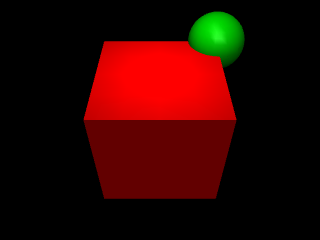

In [1]:
import mujoco
import mediapy as media
import matplotlib.pyplot as plt

xml = """
<mujoco>
  <worldbody>
    <light name="top" pos="0 0 1"/>
    <geom name="red_box" type="box" size=".2 .2 .2" rgba="1 0 0 1"/>
    <geom name="green_sphere" pos=".2 .2 .2" size=".1" rgba="0 1 0 1"/>
  </worldbody>
</mujoco>
"""
model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)
renderer = mujoco.Renderer(model)

mujoco.mj_forward(model, data)
renderer.update_scene(data)

media.show_image(renderer.render())

In [1]:
import mujoco
import mediapy as media
import matplotlib.pyplot as plt

xml = """
<mujoco>
  <worldbody>
    <light name="top" pos="0 0 1"/>
    <body name="box_and_sphere" euler="0 0 -30">
      <joint name="swing" type="hinge" axis="1 -1 0" pos="-.2 -.2 -.2"/>
      <geom name="red_box" type="box" size=".2 .2 .2" rgba="1 0 0 1"/>
      <geom name="green_sphere" pos=".2 .2 .2" size=".1" rgba="0 1 0 1"/>
    </body>
  </worldbody>
</mujoco>
"""
model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)
renderer = mujoco.Renderer(model)

# enable joint visualization option:
scene_option = mujoco.MjvOption()
scene_option.flags[mujoco.mjtVisFlag.mjVIS_JOINT] = True

duration = 3.8  # (seconds)
framerate = 60  # (Hz)

frames = []
mujoco.mj_resetData(model, data)
while data.time < duration:
  mujoco.mj_step(model, data)
  if len(frames) < data.time * framerate:
    renderer.update_scene(data, scene_option=scene_option)
    pixels = renderer.render()
    frames.append(pixels)

# Simulate and display video.
media.show_video(frames, fps=framerate)